# Simple Tweet Analysis

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from datetime import datetime

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
import re

import tensorflow as tf
import keras

# Import various componenets for model building
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Flatten, Conv1D, MaxPooling1D
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Input, TimeDistributed
from keras.models import Model
from keras.optimizers import SGD

# Import the backend
from keras import backend as K


from collections import Counter
%matplotlib inline

C:\Users\aksha\AppData\Local\conda\conda\envs\tweet_analysis\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\aksha\AppData\Local\conda\conda\envs\tweet_analysis\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
C:\Users\aksha\AppData\Local\conda\conda\envs\tweet_analysis\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\aksha\AppData\Local\conda\conda\envs\tweet_analysis\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
Using TensorFlow backend.


## Data
Comes from....

In [2]:
raw_data = pd.read_csv('./russian-troll-tweets/IRAhandle_tweets_1.csv')
raw_data.head(10)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll
5,9.060000e+17,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",Unknown,English,10/1/2017 2:47,10/1/2017 2:47,1050,9644,247,NaN,Right,0,0,RightTroll
6,9.060000e+17,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z,Unknown,English,10/1/2017 2:48,10/1/2017 2:48,1050,9644,248,RETWEET,Right,0,1,RightTroll
7,9.060000e+17,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,Unknown,English,10/1/2017 2:52,10/1/2017 2:53,1050,9644,249,NaN,Right,0,0,RightTroll
8,9.060000e+17,10_GOP,"As much as I hate promoting CNN article, here ...",Unknown,English,10/1/2017 3:47,10/1/2017 3:47,1050,9646,250,NaN,Right,0,0,RightTroll
9,9.060000e+17,10_GOP,After the 'genocide' remark from San Juan Mayo...,Unknown,English,10/1/2017 3:51,10/1/2017 3:51,1050,9646,251,NaN,Right,0,0,RightTroll


In [3]:
# Make sure it is not containing Null values
null_count = raw_data.isnull().sum()
null_count[null_count>0]

region          318
post_type    183766
dtype: int64

In [4]:
raw_data['region'] = raw_data.post_type.fillna('Unknown')

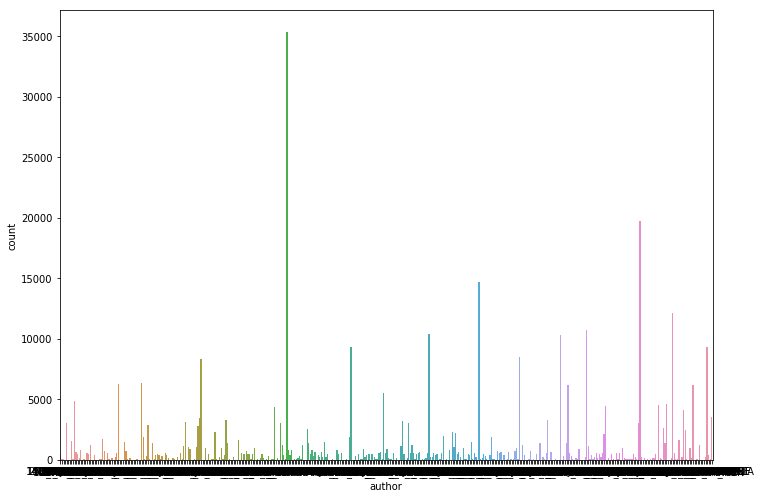

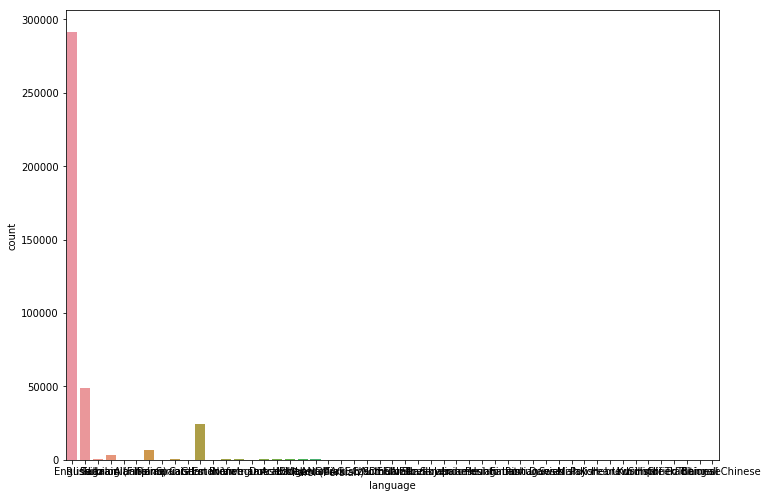

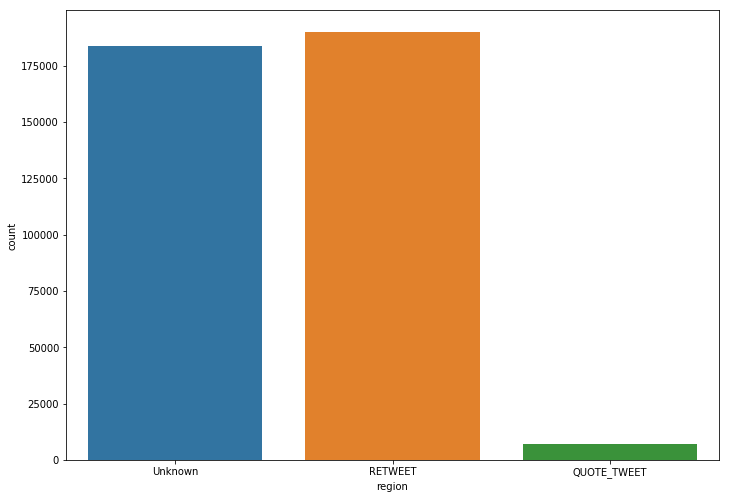

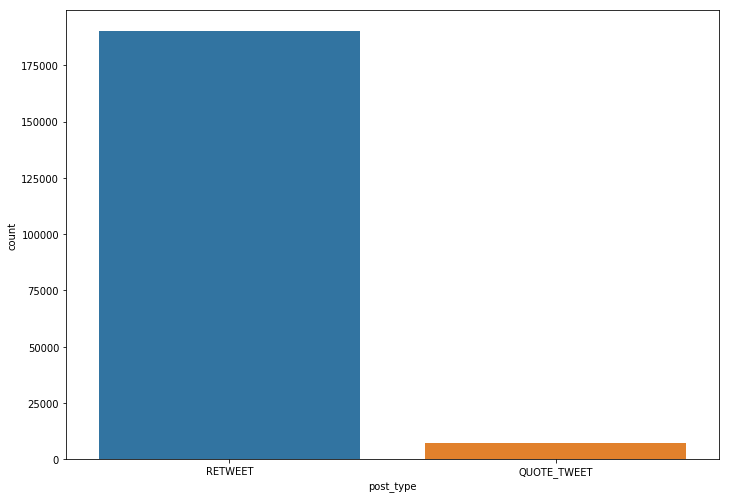

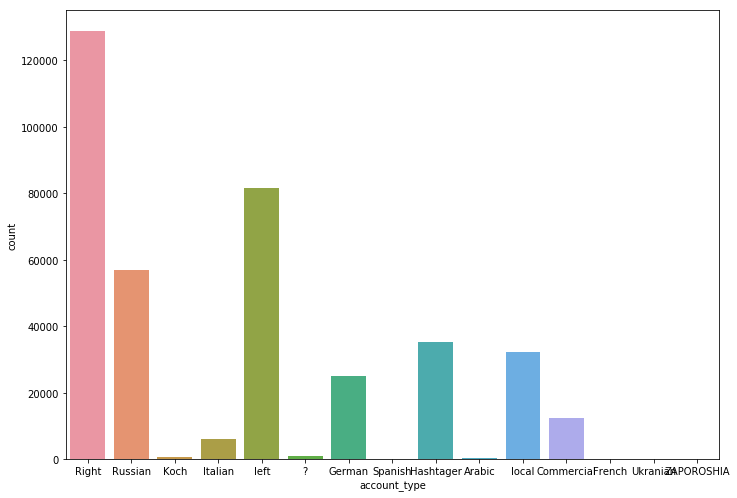

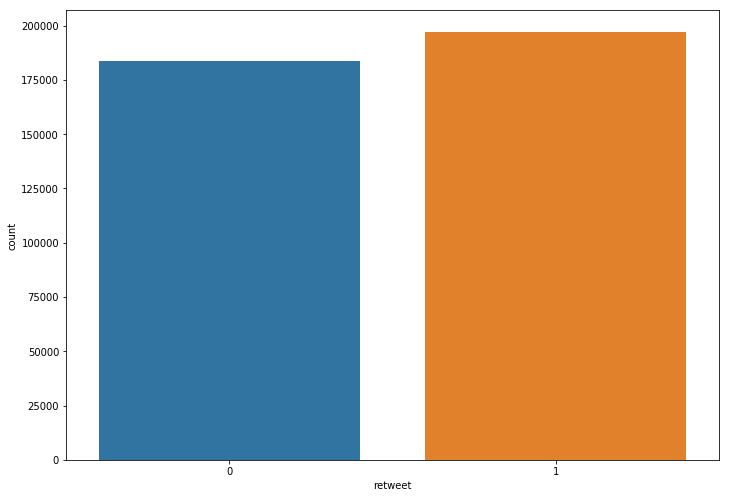

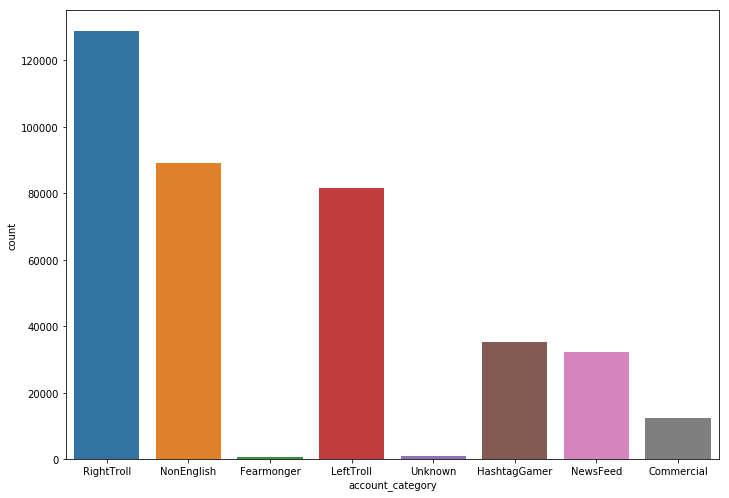

In [5]:
#Visulizations
cat_list = ['author', 'language', 'region', 'post_type', 'account_type', 'retweet', 'account_category']
for ls in cat_list:
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.countplot(x=ls, data=raw_data)
    plt.show()

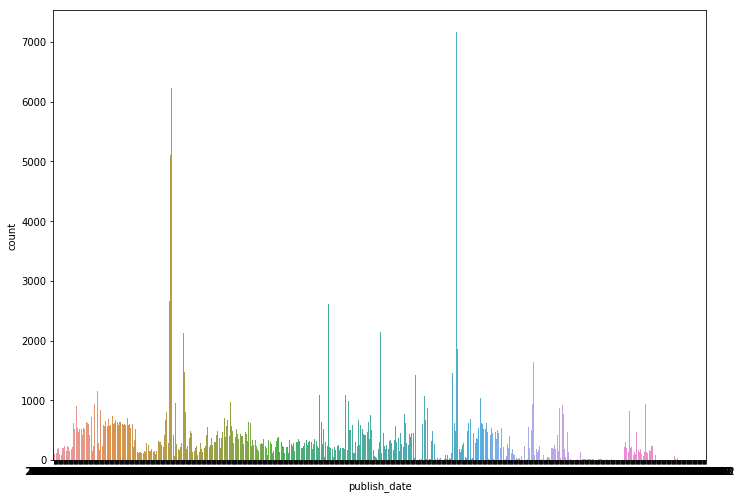

In [6]:
# Convert the publish date to a readable format in Pandas
raw_data["publish_date"] = raw_data["publish_date"].apply(lambda x: \
    datetime.strptime(x,"%m/%d/%Y %H:%M"))
date = raw_data['publish_date'].dt.date
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x=date, data=raw_data)
plt.show()

In [7]:
# See the days with the most tweets
date.value_counts()

2017-08-16    7174
2017-08-12    6802
2017-08-18    6235
2017-08-15    5985
2017-08-17    5826
2017-08-13    5201
2017-08-14    5108
2016-10-06    3509
2017-08-10    2844
2017-08-09    2783
2017-08-11    2661
2015-07-22    2606
2016-10-07    2145
2016-09-17    2125
2017-08-08    1854
2015-07-21    1826
2015-07-03    1826
2016-09-18    1749
2015-07-06    1634
2016-09-19    1470
2015-07-07    1453
2015-06-27    1428
2015-06-29    1366
2015-06-28    1364
2016-09-16    1321
2017-08-03    1310
2015-07-05    1173
2017-08-07    1155
2015-06-26    1086
2015-11-15    1080
              ... 
2018-01-24       1
2013-06-05       1
2018-04-29       1
2018-02-09       1
2015-03-25       1
2014-12-17       1
2018-01-09       1
2012-11-21       1
2017-11-27       1
2013-02-01       1
2014-02-15       1
2018-03-16       1
2013-12-20       1
2013-05-23       1
2015-04-15       1
2013-05-19       1
2015-05-05       1
2018-02-15       1
2015-02-11       1
2014-04-06       1
2018-02-26       1
2013-06-15  

In [8]:
#Get rid of some columns that aren't really relevant to analysis
raw_data.drop(['harvested_date', 'new_june_2018'], axis=1)

#Turn Post_Type binary
raw_data.post_type.replace(['RETWEET'], [1], inplace=True)
raw_data['post_type'] = raw_data.post_type.fillna(0)


raw_data.head(10)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01 19:58:00,10/1/2017 19:59,1052,9636,253,0,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01 22:43:00,10/1/2017 22:43,1054,9637,254,0,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,RETWEET,English,2017-10-01 22:50:00,10/1/2017 22:51,1054,9637,255,1,Right,0,1,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01 23:52:00,10/1/2017 23:52,1062,9642,256,0,Right,0,0,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",RETWEET,English,2017-10-01 02:13:00,10/1/2017 2:13,1050,9645,246,1,Right,0,1,RightTroll
5,9.060000e+17,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",Unknown,English,2017-10-01 02:47:00,10/1/2017 2:47,1050,9644,247,0,Right,0,0,RightTroll
6,9.060000e+17,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z,RETWEET,English,2017-10-01 02:48:00,10/1/2017 2:48,1050,9644,248,1,Right,0,1,RightTroll
7,9.060000e+17,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,Unknown,English,2017-10-01 02:52:00,10/1/2017 2:53,1050,9644,249,0,Right,0,0,RightTroll
8,9.060000e+17,10_GOP,"As much as I hate promoting CNN article, here ...",Unknown,English,2017-10-01 03:47:00,10/1/2017 3:47,1050,9646,250,0,Right,0,0,RightTroll
9,9.060000e+17,10_GOP,After the 'genocide' remark from San Juan Mayo...,Unknown,English,2017-10-01 03:51:00,10/1/2017 3:51,1050,9646,251,0,Right,0,0,RightTroll


In [9]:
""" I will work on this later converting the values to numbers for further analysis
# Create a list of possible answers
account_type_list = list(raw_data.account_type.unique())

# Create the key for the list
account_type_key = list(range(len(account_type_list)))

# Create the dictionary and insert the dictionary into our dataframe
account_type_dict = dict(list(zip(account_type_list, account_type_key)))

raw_data['variety'] = raw_data['variety'].replace(variety_dict)

# Print out the dictionary so we can understand what the computer is thinking
print(account_type_dict)"""

" I will work on this later converting the values to numbers for further analysis\n# Create a list of possible answers\naccount_type_list = list(raw_data.account_type.unique())\n\n# Create the key for the list\naccount_type_key = list(range(len(account_type_list)))\n\n# Create the dictionary and insert the dictionary into our dataframe\naccount_type_dict = dict(list(zip(account_type_list, account_type_key)))\n\nraw_data['variety'] = raw_data['variety'].replace(variety_dict)\n\n# Print out the dictionary so we can understand what the computer is thinking\nprint(account_type_dict)"

## Prepare for Testing


Now, let's prep the descriptions for analysis first by cleaning out some of the punctuation.

In [10]:
test_df = raw_data[raw_data.language == 'English']
test_df = test_df[['author', 'content']]
test_df.head(10)

,author,content
0,10_GOP,"""We have a sitting Democrat US Senator on tria..."
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...
3,10_GOP,JUST IN: President Trump dedicates Presidents ...
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF..."
5,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th..."
6,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z
7,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...
8,10_GOP,"As much as I hate promoting CNN article, here ..."
9,10_GOP,After the 'genocide' remark from San Juan Mayo...


In [11]:
# Getting rid of authors that haven't published more than a certain number of tweets
author_counts = test_df['author'].value_counts().rename('author_counts')
print(author_counts)
# Attach the counts to the dataframe
test_df = test_df.merge(author_counts.to_frame(),
                                left_on='author', right_index=True)

# Set the threshold and get rid of the counts category
test_df = test_df[test_df['author_counts'] > 10000]
test_df = test_df.drop(['author_counts'], axis=1)

AMELIEBALDWIN      34416
ARM_2_ALAN         14530
BIZGOD             12079
BATONROUGEVOICE    10746
BALTIMORE0NLINE    10322
ANTONHAYHAY        10240
BLEEPTHEPOLICE      9275
ANDYHASHTAGGER      9131
ATLANTA_ONLINE      8489
ALECMOOOOODY        8310
ADNNELSTR           6362
BLACKTOLIVE         6183
ACEJINEV            6134
BAOBAEHAM           6054
ANIIANTRS           5486
4MYSQUAD            4780
BIGSEANBEAST        4529
BEEBCLAPTT          4442
BGARNER2107         4426
AMANDAVGREEN        4233
BLACKMATTERSUS      4129
BLMSOLDIER          3543
ALDRICH420          3481
ALEXXDRTRR          3266
BABYJANNYMEOW       3205
AIDEN7757           3069
AMBERLINETR         3008
ANNIEPOSHES         2976
ALBUQUERQUEON       2823
ADRIENNE_GG         2810
                   ...  
ACTIVEMIKR             1
AAGN1AA                1
ANETTANOVGOROD         1
ANTYSHEVALIDA          1
ANDRY_VOLK             1
BEKOSV                 1
ASYAARRIVE             1
ANJELICAFAMOUS         1
BELKADASHECHKA         1


In [12]:
# Create a list of possible answers
author_list = list(raw_data.author.unique())

# Create the key for the list
author_key = list(range(len(author_list)))

# Create the dictionary and insert the dictionary into our dataframe
author_dict = dict(list(zip(author_list, author_key)))

test_df['author'] = test_df['author'].replace(author_dict)

# Print out the dictionary so we can understand what the computer is thinking
print(author_dict)

{'AGAINUKRFAKE': 66, 'ABALAKOVAYLIA': 22, 'ARTEMBOGACHENKO': 274, 'AARON_M1TCHELL': 21, 'BETTIEEVANZ': 379, 'AMIRAFERRR': 149, 'BIGSEANBEAST': 388, 'BANTTANANTTA': 324, 'ANDRREETRT': 180, 'BEREHAYYTR': 367, 'AFEELIUTR': 59, 'ALANISSTRS': 82, 'ALEXHARRITONOV': 99, 'ANFRAIZER': 192, 'APRRILSBRUSS': 249, 'ALEKSEY_SOKOL_': 93, 'BILLMCINTOSHH': 390, 'BLACKTOLIVE': 405, 'ALI27HUSSEIN': 112, '4EVER_SUSAN': 8, 'BIGBOYJASIAH': 386, 'ABBASSHUKRI': 23, 'AUSTINLOVESBEER': 297, 'BARRY_MILL': 333, 'ALISA_FRATKINA': 120, 'BILAAL_RAIS': 389, 'ANDEERLWR': 167, 'ANGELINADARCY_': 199, 'AGNESSTRYT': 71, 'ALFREDBENBEN': 110, 'ANISSNOVOTR': 210, 'BEKKOSV': 355, 'ARIELLE_BROWNIN': 259, 'BELKADASHECHKA': 360, 'ABU_UBAIDA2': 34, 'ANYA_ISA1282': 244, 'ARTEM_POLISHHUK': 277, 'AMBAASTRT': 138, 'AMAMCAMCAM': 136, '1D_NICOLE_': 2, 'ALAXXATR': 83, 'BARBARAFORTRUMP': 327, 'ADLEESWOD': 51, 'ANFISAMICKEY': 191, 'AGNESGRHM': 69, 'AMYGRABMYESSAY': 153, 'ALINANOVIKOV022': 117, 'BETTERTHANYOU_U': 378, 'ANATOLRMNFF': 164, '

In [13]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text
test_df['content'] = test_df['content'].str.lower()
test_df['content'] = test_df['content'].apply(text_cleaner)
test_df.head(10)

,author,content
95228,145,"#pos #anisamri ,the terrorist that killed 12 p..."
95229,145,join us live online! saturdays \| 5 &amp; 6:30...
95230,145,"'@pmbeers here's the thing, if i were to impor..."
95231,145,'@cda the issue has nothing to do with png. it...
95232,145,#bestmemoriesof2016 every person who got invol...
95233,145,hitman sniper #hitmansniper #now #gamers #andr...
95234,145,#hacked : https://t.co/y9ryl2qf2g obama strike...
95235,145,"boycott the ""halal"" sticker on meat and poultr..."
95236,145,oh dear did you see this cnn don lemon obvious...
95237,145,amazing that so many who allegedly oppose big ...


Let's create a function that will run all of the tests we need with the inputs of test, inputs (X,Y), and method.

In [14]:
#Create a testing function that will fit the test the data.
def testing_func(test, models, method):
    # This is a local list used to temporarily store scores
    scores=[]
    # This list serves the For loop below putting the variables in   
    for x in models:
        #Fitting to Training Data
        test.fit(x[0], x[1])
        #Training Data Score
        scores.append(test.score(x[0], x[1]))
        #Test Data Score
        scores.append(test.score(x[2], x[3]))
        #CV Score
        scores.append(np.mean(cross_val_score(test, x[0], x[1], cv=5)))
    
    # Create a local dataframe to display our results cleanly
    local_results_df=pd.DataFrame(scores, columns=['Accuracy'], index=[method])
    print(local_results_df)
 

## TF_IDF
First, let's use Term Frequency - Inverse Document Frequency (TF-IDF) to break the sentences down into vectors. What this will do is take the number of times a word appears in the tweet and penalize it if it appears in too many tweets by multiplying it by the log (base 2) of the number of documents divided by the frequency of the word in all of the documents. This will result in words that appear in every tweet to be less important (through a lower weighting) when trying to decipher if the word is important for classification. Logically speaking, if a word appears in every sentence, it cannot be that helpful in distinguishing one sentence from another and this is what the machine will need to do to classify the descriptions to the authors.

In [15]:
start = datetime.now()
X = test_df['content']
y = test_df['author']
#Applying the vectorizer
vect2 = TfidfVectorizer(min_df=20, analyzer = 'word', stop_words = 'english', ngram_range = (1,2))
X = vect2.fit_transform(X)
#splitting into training and test sets
X_train_tfidf, X_test_tfidf, y_train2, y_test2= train_test_split(X, y, test_size=0.4, random_state=0)
print('\nIt took the following time to complete this task:', datetime.now() - start)


It took the following time to complete this task: 0:00:06.734519


## LSA
Now let's use Latent Semantic Analysis (LSA) to improve the model through dimension reduction. This applies Principle Components Analysis (PCA) to the vector matrix.

In [16]:
start = datetime.now()
# Apply Singular Value Decomposition to reduce dimensions without doing mean-center nromalizing. 
svd= TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.fit_transform(X_test_tfidf)
print('\nIt took the following time to complete this task:', datetime.now() - start)


It took the following time to complete this task: 0:00:04.129932


In [17]:
start = datetime.now()
# Go ahead and create our X variable for unsupervised learning
tfidf_X = test_df['content']

#Applying the vectorizer
vect2 = TfidfVectorizer(min_df=20, analyzer = 'word', stop_words = 'english', ngram_range = (1,2))
tfidf_X = vect2.fit_transform(tfidf_X)
#Apply SVD for LSA which tends to work better for unsupervised learning techniques like clustering.
svd= TruncatedSVD(60)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
lsa_X = lsa.fit_transform(tfidf_X)
variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print('\nIt took the following time to complete this task:', datetime.now() - start)


It took the following time to complete this task: 0:00:09.355094


In [18]:
# Our X,Y for the models
models = [[X_train_tfidf, y_train2, X_test_tfidf, y_test2], [X_train_lsa, y_train2, X_test_lsa, y_test2]] 

# TF_IDF is the method
tf_idf_method = ['TF-IDF Training', 'TF-IDF Test', 'TF-IDF Cross Validation', 
                 'TF-IDF with LSA Training', 'TF-IDF with LSA Test', 'TF-IDF with LSA Cross Validation']



In [19]:
# Start with a simple sequential model
model = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model.add(Dense(128, activation='sigmoid', input_shape=(X_test_tfidf.shape[1],)))
# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model.add(Dense(1, activation='sigmoid'))

model.summary()
sgd = SGD(lr = 0.1, momentum = 0.9, decay = 0, nesterov = False)
# Compile the model to put it all together.
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               920704    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total para

In [20]:
start = datetime.now()
history = model.fit(X_train_tfidf, y_train2,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test_tfidf, y_test2))
score = model.evaluate(X_test_tfidf, y_test2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('\nIt took the following time to complete this task:', datetime.now() - start)

Train on 55399 samples, validate on 36934 samples
Epoch 1/10


44224/55399 [======================>.......] - ETA: 7:27 - loss: -10.7677 - acc: 0.0000e+0 - ETA: 1:39 - loss: -3207.0710 - acc: 0.0000e+0 - ETA: 1:00 - loss: -3483.3343 - acc: 0.0000e+0 - ETA: 45s - loss: -3622.4322 - acc: 0.0000e+0 - ETA: 37s - loss: -3693.3468 - acc: 0.0000e+ - ETA: 32s - loss: -3726.4639 - acc: 0.0000e+ - ETA: 29s - loss: -3760.6015 - acc: 0.0000e+ - ETA: 27s - loss: -3804.7431 - acc: 0.0000e+ - ETA: 25s - loss: -3824.2114 - acc: 0.0000e+ - ETA: 23s - loss: -3855.6955 - acc: 0.0000e+ - ETA: 22s - loss: -3855.6708 - acc: 0.0000e+ - ETA: 21s - loss: -3857.6487 - acc: 0.0000e+ - ETA: 20s - loss: -3868.9119 - acc: 0.0000e+ - ETA: 20s - loss: -3870.1184 - acc: 0.0000e+ - ETA: 19s - loss: -3860.4617 - acc: 0.0000e+ - ETA: 18s - loss: -3866.8419 - acc: 0.0000e+ - ETA: 18s - loss: -3871.4787 - acc: 0.0000e+ - ETA: 18s - loss: -3885.7694 - acc: 0.0000e+ - ETA: 17s - loss: -3881.4528 - acc: 0.0000e+ - ETA: 17s - loss: -3892.9642 - acc: 0.0000e+ - ETA: 16s - loss: -3903.5570 

55399/55399 [==============================] - ETA: 2s - loss: -3936.1640 - acc: 0.0000e+0 - ETA: 2s - loss: -3935.6075 - acc: 0.0000e+0 - ETA: 2s - loss: -3935.5088 - acc: 0.0000e+0 - ETA: 2s - loss: -3935.3684 - acc: 0.0000e+0 - ETA: 2s - loss: -3935.8346 - acc: 0.0000e+0 - ETA: 2s - loss: -3934.8699 - acc: 0.0000e+0 - ETA: 2s - loss: -3934.4927 - acc: 0.0000e+0 - ETA: 2s - loss: -3935.0552 - acc: 0.0000e+0 - ETA: 2s - loss: -3934.9141 - acc: 0.0000e+0 - ETA: 2s - loss: -3934.7523 - acc: 0.0000e+0 - ETA: 2s - loss: -3935.2666 - acc: 0.0000e+0 - ETA: 1s - loss: -3935.3679 - acc: 0.0000e+0 - ETA: 1s - loss: -3935.6477 - acc: 0.0000e+0 - ETA: 1s - loss: -3935.0217 - acc: 0.0000e+0 - ETA: 1s - loss: -3934.2196 - acc: 0.0000e+0 - ETA: 1s - loss: -3935.1275 - acc: 0.0000e+0 - ETA: 1s - loss: -3936.5479 - acc: 0.0000e+0 - ETA: 1s - loss: -3935.8839 - acc: 0.0000e+0 - ETA: 1s - loss: -3935.7337 - acc: 0.0000e+0 - ETA: 1s - loss: -3936.1280 - acc: 0.0000e+0 - ETA: 1s - loss: -3935.6701 - acc:

43584/55399 [======================>.......] - ETA: 13s - loss: -3887.2017 - acc: 0.0000e+ - ETA: 12s - loss: -3932.9365 - acc: 0.0000e+ - ETA: 12s - loss: -3989.9693 - acc: 0.0000e+ - ETA: 12s - loss: -3998.7027 - acc: 0.0000e+ - ETA: 12s - loss: -4007.1214 - acc: 0.0000e+ - ETA: 12s - loss: -3978.9773 - acc: 0.0000e+ - ETA: 12s - loss: -3964.7914 - acc: 0.0000e+ - ETA: 12s - loss: -3992.5710 - acc: 0.0000e+ - ETA: 11s - loss: -3995.1903 - acc: 0.0000e+ - ETA: 11s - loss: -3996.8393 - acc: 0.0000e+ - ETA: 11s - loss: -3990.5782 - acc: 0.0000e+ - ETA: 11s - loss: -3975.4717 - acc: 0.0000e+ - ETA: 11s - loss: -3961.2963 - acc: 0.0000e+ - ETA: 11s - loss: -3960.7050 - acc: 0.0000e+ - ETA: 11s - loss: -3962.2027 - acc: 0.0000e+ - ETA: 11s - loss: -3957.8604 - acc: 0.0000e+ - ETA: 11s - loss: -3959.8533 - acc: 0.0000e+ - ETA: 11s - loss: -3953.2207 - acc: 0.0000e+ - ETA: 11s - loss: -3947.2846 - acc: 0.0000e+ - ETA: 11s - loss: -3938.4120 - acc: 0.0000e+ - ETA: 11s - loss: -3935.1247 - acc

55399/55399 [==============================] - ETA: 2s - loss: -3940.8030 - acc: 0.0000e+0 - ETA: 2s - loss: -3941.1576 - acc: 0.0000e+0 - ETA: 2s - loss: -3940.2871 - acc: 0.0000e+0 - ETA: 2s - loss: -3940.8961 - acc: 0.0000e+0 - ETA: 2s - loss: -3941.3972 - acc: 0.0000e+0 - ETA: 2s - loss: -3940.7483 - acc: 0.0000e+0 - ETA: 2s - loss: -3940.9765 - acc: 0.0000e+0 - ETA: 2s - loss: -3941.3794 - acc: 0.0000e+0 - ETA: 2s - loss: -3941.3549 - acc: 0.0000e+0 - ETA: 2s - loss: -3942.2525 - acc: 0.0000e+0 - ETA: 2s - loss: -3942.3010 - acc: 0.0000e+0 - ETA: 2s - loss: -3942.1921 - acc: 0.0000e+0 - ETA: 2s - loss: -3941.9341 - acc: 0.0000e+0 - ETA: 2s - loss: -3942.8071 - acc: 0.0000e+0 - ETA: 2s - loss: -3942.5162 - acc: 0.0000e+0 - ETA: 2s - loss: -3942.5168 - acc: 0.0000e+0 - ETA: 2s - loss: -3942.2410 - acc: 0.0000e+0 - ETA: 1s - loss: -3942.8257 - acc: 0.0000e+0 - ETA: 1s - loss: -3943.2007 - acc: 0.0000e+0 - ETA: 1s - loss: -3943.4215 - acc: 0.0000e+0 - ETA: 1s - loss: -3943.3151 - acc:

45248/55399 [=======================>......] - ETA: 12s - loss: -4149.0059 - acc: 0.0000e+ - ETA: 12s - loss: -3911.7133 - acc: 0.0000e+ - ETA: 13s - loss: -3958.1676 - acc: 0.0000e+ - ETA: 12s - loss: -3909.3717 - acc: 0.0000e+ - ETA: 12s - loss: -3888.9016 - acc: 0.0000e+ - ETA: 12s - loss: -3916.8091 - acc: 0.0000e+ - ETA: 12s - loss: -3917.1137 - acc: 0.0000e+ - ETA: 12s - loss: -3909.6895 - acc: 0.0000e+ - ETA: 12s - loss: -3920.1207 - acc: 0.0000e+ - ETA: 12s - loss: -3912.3272 - acc: 0.0000e+ - ETA: 12s - loss: -3906.0180 - acc: 0.0000e+ - ETA: 12s - loss: -3904.2070 - acc: 0.0000e+ - ETA: 12s - loss: -3908.2075 - acc: 0.0000e+ - ETA: 12s - loss: -3913.8555 - acc: 0.0000e+ - ETA: 11s - loss: -3921.1886 - acc: 0.0000e+ - ETA: 11s - loss: -3928.9117 - acc: 0.0000e+ - ETA: 11s - loss: -3927.2571 - acc: 0.0000e+ - ETA: 11s - loss: -3925.5487 - acc: 0.0000e+ - ETA: 11s - loss: -3927.9962 - acc: 0.0000e+ - ETA: 11s - loss: -3934.5502 - acc: 0.0000e+ - ETA: 11s - loss: -3936.0100 - acc

55399/55399 [==============================] - ETA: 2s - loss: -3947.6044 - acc: 0.0000e+0 - ETA: 2s - loss: -3947.5773 - acc: 0.0000e+0 - ETA: 2s - loss: -3948.1273 - acc: 0.0000e+0 - ETA: 2s - loss: -3947.9711 - acc: 0.0000e+0 - ETA: 2s - loss: -3947.9287 - acc: 0.0000e+0 - ETA: 1s - loss: -3947.1994 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.9508 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.4211 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.0037 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.3028 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.2560 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.5070 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.9943 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.4816 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.4211 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.4759 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.6115 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.8173 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.1845 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.4532 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.0583 - acc:

44992/55399 [=======================>......] - ETA: 13s - loss: -4129.5762 - acc: 0.0000e+ - ETA: 13s - loss: -4041.0957 - acc: 0.0000e+ - ETA: 12s - loss: -4065.5295 - acc: 0.0000e+ - ETA: 12s - loss: -3990.6356 - acc: 0.0000e+ - ETA: 12s - loss: -3980.6288 - acc: 0.0000e+ - ETA: 12s - loss: -3986.4977 - acc: 0.0000e+ - ETA: 12s - loss: -3970.3513 - acc: 0.0000e+ - ETA: 12s - loss: -3976.6802 - acc: 0.0000e+ - ETA: 12s - loss: -3975.1189 - acc: 0.0000e+ - ETA: 12s - loss: -3963.8033 - acc: 0.0000e+ - ETA: 11s - loss: -3954.7868 - acc: 0.0000e+ - ETA: 11s - loss: -3950.9049 - acc: 0.0000e+ - ETA: 11s - loss: -3965.8716 - acc: 0.0000e+ - ETA: 11s - loss: -3975.2280 - acc: 0.0000e+ - ETA: 11s - loss: -3972.3939 - acc: 0.0000e+ - ETA: 11s - loss: -3961.9154 - acc: 0.0000e+ - ETA: 11s - loss: -3964.5684 - acc: 0.0000e+ - ETA: 11s - loss: -3954.5959 - acc: 0.0000e+ - ETA: 11s - loss: -3956.1125 - acc: 0.0000e+ - ETA: 11s - loss: -3961.6040 - acc: 0.0000e+ - ETA: 11s - loss: -3955.8350 - acc

55399/55399 [==============================] - ETA: 2s - loss: -3947.2968 - acc: 0.0000e+0 - ETA: 2s - loss: -3947.6111 - acc: 0.0000e+0 - ETA: 2s - loss: -3947.4585 - acc: 0.0000e+0 - ETA: 2s - loss: -3947.0574 - acc: 0.0000e+0 - ETA: 2s - loss: -3947.6590 - acc: 0.0000e+0 - ETA: 2s - loss: -3947.4342 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.4160 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.2578 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.8546 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.5532 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.5935 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.7571 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.6891 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.1101 - acc: 0.0000e+0 - ETA: 1s - loss: -3947.0899 - acc: 0.0000e+0 - ETA: 1s - loss: -3947.0530 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.8462 - acc: 0.0000e+0 - ETA: 1s - loss: -3947.1529 - acc: 0.0000e+0 - ETA: 1s - loss: -3947.0129 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.1751 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.5806 - acc:

44992/55399 [=======================>......] - ETA: 13s - loss: -3821.4395 - acc: 0.0000e+ - ETA: 12s - loss: -3995.7097 - acc: 0.0000e+ - ETA: 12s - loss: -3986.0114 - acc: 0.0000e+ - ETA: 12s - loss: -3936.6577 - acc: 0.0000e+ - ETA: 12s - loss: -3925.0210 - acc: 0.0000e+ - ETA: 12s - loss: -3905.7657 - acc: 0.0000e+ - ETA: 12s - loss: -3916.2767 - acc: 0.0000e+ - ETA: 12s - loss: -3913.4861 - acc: 0.0000e+ - ETA: 12s - loss: -3906.7524 - acc: 0.0000e+ - ETA: 12s - loss: -3913.2226 - acc: 0.0000e+ - ETA: 12s - loss: -3919.4329 - acc: 0.0000e+ - ETA: 12s - loss: -3918.1898 - acc: 0.0000e+ - ETA: 12s - loss: -3917.6479 - acc: 0.0000e+ - ETA: 12s - loss: -3919.5566 - acc: 0.0000e+ - ETA: 11s - loss: -3920.5724 - acc: 0.0000e+ - ETA: 11s - loss: -3924.4524 - acc: 0.0000e+ - ETA: 11s - loss: -3921.9953 - acc: 0.0000e+ - ETA: 11s - loss: -3929.4224 - acc: 0.0000e+ - ETA: 11s - loss: -3922.5125 - acc: 0.0000e+ - ETA: 11s - loss: -3917.5596 - acc: 0.0000e+ - ETA: 11s - loss: -3916.9923 - acc

55399/55399 [==============================] - ETA: 2s - loss: -3946.6295 - acc: 0.0000e+0 - ETA: 2s - loss: -3946.6612 - acc: 0.0000e+0 - ETA: 2s - loss: -3946.3874 - acc: 0.0000e+0 - ETA: 2s - loss: -3946.5049 - acc: 0.0000e+0 - ETA: 2s - loss: -3945.7748 - acc: 0.0000e+0 - ETA: 2s - loss: -3945.1984 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.5420 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.9006 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.4881 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.9624 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.3390 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.0725 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.9410 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.7676 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.6842 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.5906 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.1217 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.7489 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.5174 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.3611 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.7063 - acc:

44928/55399 [=======================>......] - ETA: 13s - loss: -3743.9692 - acc: 0.0000e+ - ETA: 12s - loss: -3953.6616 - acc: 0.0000e+ - ETA: 12s - loss: -3924.2623 - acc: 0.0000e+ - ETA: 12s - loss: -3976.6477 - acc: 0.0000e+ - ETA: 12s - loss: -3979.2368 - acc: 0.0000e+ - ETA: 12s - loss: -3970.0897 - acc: 0.0000e+ - ETA: 12s - loss: -3964.9624 - acc: 0.0000e+ - ETA: 12s - loss: -3951.9410 - acc: 0.0000e+ - ETA: 12s - loss: -3968.1359 - acc: 0.0000e+ - ETA: 12s - loss: -3969.3217 - acc: 0.0000e+ - ETA: 12s - loss: -3966.0855 - acc: 0.0000e+ - ETA: 12s - loss: -3956.4345 - acc: 0.0000e+ - ETA: 12s - loss: -3950.3174 - acc: 0.0000e+ - ETA: 12s - loss: -3947.4791 - acc: 0.0000e+ - ETA: 12s - loss: -3936.0654 - acc: 0.0000e+ - ETA: 11s - loss: -3936.3243 - acc: 0.0000e+ - ETA: 11s - loss: -3937.9442 - acc: 0.0000e+ - ETA: 11s - loss: -3943.2859 - acc: 0.0000e+ - ETA: 11s - loss: -3942.9448 - acc: 0.0000e+ - ETA: 11s - loss: -3942.8690 - acc: 0.0000e+ - ETA: 11s - loss: -3943.5980 - acc

55399/55399 [==============================] - ETA: 2s - loss: -3942.8749 - acc: 0.0000e+0 - ETA: 2s - loss: -3942.8040 - acc: 0.0000e+0 - ETA: 2s - loss: -3942.6561 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.6805 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.0374 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.5567 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.1392 - acc: 0.0000e+0 - ETA: 1s - loss: -3942.2980 - acc: 0.0000e+0 - ETA: 1s - loss: -3942.1866 - acc: 0.0000e+0 - ETA: 1s - loss: -3942.8489 - acc: 0.0000e+0 - ETA: 1s - loss: -3942.9065 - acc: 0.0000e+0 - ETA: 1s - loss: -3942.8631 - acc: 0.0000e+0 - ETA: 1s - loss: -3942.9280 - acc: 0.0000e+0 - ETA: 1s - loss: -3942.8221 - acc: 0.0000e+0 - ETA: 1s - loss: -3943.2685 - acc: 0.0000e+0 - ETA: 1s - loss: -3943.7754 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.3464 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.7003 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.5088 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.3879 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.1758 - acc:

44992/55399 [=======================>......] - ETA: 13s - loss: -4263.8408 - acc: 0.0000e+ - ETA: 12s - loss: -4051.2091 - acc: 0.0000e+ - ETA: 12s - loss: -4052.0781 - acc: 0.0000e+ - ETA: 12s - loss: -4052.6423 - acc: 0.0000e+ - ETA: 12s - loss: -4024.1334 - acc: 0.0000e+ - ETA: 12s - loss: -4005.6784 - acc: 0.0000e+ - ETA: 12s - loss: -3996.8754 - acc: 0.0000e+ - ETA: 12s - loss: -3991.9182 - acc: 0.0000e+ - ETA: 12s - loss: -3985.6264 - acc: 0.0000e+ - ETA: 12s - loss: -3985.1990 - acc: 0.0000e+ - ETA: 12s - loss: -3968.7728 - acc: 0.0000e+ - ETA: 12s - loss: -3958.8927 - acc: 0.0000e+ - ETA: 12s - loss: -3962.8366 - acc: 0.0000e+ - ETA: 12s - loss: -3953.2649 - acc: 0.0000e+ - ETA: 12s - loss: -3957.9024 - acc: 0.0000e+ - ETA: 11s - loss: -3960.9312 - acc: 0.0000e+ - ETA: 11s - loss: -3962.0927 - acc: 0.0000e+ - ETA: 11s - loss: -3946.5994 - acc: 0.0000e+ - ETA: 11s - loss: -3941.5362 - acc: 0.0000e+ - ETA: 11s - loss: -3945.3100 - acc: 0.0000e+ - ETA: 11s - loss: -3940.9243 - acc

55399/55399 [==============================] - ETA: 2s - loss: -3945.1064 - acc: 0.0000e+0 - ETA: 2s - loss: -3944.5438 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.8255 - acc: 0.0000e+0 - ETA: 2s - loss: -3944.7580 - acc: 0.0000e+0 - ETA: 2s - loss: -3944.9364 - acc: 0.0000e+0 - ETA: 2s - loss: -3944.6218 - acc: 0.0000e+0 - ETA: 2s - loss: -3945.0607 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.5006 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.1237 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.1797 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.4194 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.8825 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.0437 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.6982 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.9211 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.3612 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.2330 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.7126 - acc: 0.0000e+0 - ETA: 1s - loss: -3943.9079 - acc: 0.0000e+0 - ETA: 1s - loss: -3943.3634 - acc: 0.0000e+0 - ETA: 1s - loss: -3942.9178 - acc:

44864/55399 [=======================>......] - ETA: 14s - loss: -3775.6050 - acc: 0.0000e+ - ETA: 13s - loss: -3818.6993 - acc: 0.0000e+ - ETA: 13s - loss: -3846.9029 - acc: 0.0000e+ - ETA: 13s - loss: -3825.2908 - acc: 0.0000e+ - ETA: 12s - loss: -3845.0745 - acc: 0.0000e+ - ETA: 12s - loss: -3873.5606 - acc: 0.0000e+ - ETA: 12s - loss: -3860.9965 - acc: 0.0000e+ - ETA: 12s - loss: -3875.0216 - acc: 0.0000e+ - ETA: 12s - loss: -3886.3261 - acc: 0.0000e+ - ETA: 12s - loss: -3892.0962 - acc: 0.0000e+ - ETA: 12s - loss: -3891.5276 - acc: 0.0000e+ - ETA: 12s - loss: -3905.1702 - acc: 0.0000e+ - ETA: 12s - loss: -3909.3411 - acc: 0.0000e+ - ETA: 12s - loss: -3915.2466 - acc: 0.0000e+ - ETA: 12s - loss: -3910.2501 - acc: 0.0000e+ - ETA: 12s - loss: -3908.8285 - acc: 0.0000e+ - ETA: 11s - loss: -3904.5315 - acc: 0.0000e+ - ETA: 11s - loss: -3905.3752 - acc: 0.0000e+ - ETA: 11s - loss: -3904.7923 - acc: 0.0000e+ - ETA: 11s - loss: -3905.8066 - acc: 0.0000e+ - ETA: 11s - loss: -3910.1005 - acc

55399/55399 [==============================] - ETA: 2s - loss: -3943.5605 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.7235 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.7251 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.8451 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.8490 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.6200 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.1970 - acc: 0.0000e+0 - ETA: 1s - loss: -3943.6316 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.2017 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.4386 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.5466 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.2104 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.3949 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.1739 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.7884 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.6696 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.9197 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.5774 - acc: 0.0000e+0 - ETA: 1s - loss: -3947.1973 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.5727 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.2191 - acc:

44352/55399 [=======================>......] - ETA: 13s - loss: -3662.7629 - acc: 0.0000e+ - ETA: 12s - loss: -4042.7896 - acc: 0.0000e+ - ETA: 12s - loss: -3939.9556 - acc: 0.0000e+ - ETA: 12s - loss: -3930.9858 - acc: 0.0000e+ - ETA: 12s - loss: -3930.3107 - acc: 0.0000e+ - ETA: 12s - loss: -3919.5972 - acc: 0.0000e+ - ETA: 12s - loss: -3918.3912 - acc: 0.0000e+ - ETA: 13s - loss: -3911.6782 - acc: 0.0000e+ - ETA: 13s - loss: -3920.3404 - acc: 0.0000e+ - ETA: 13s - loss: -3914.5197 - acc: 0.0000e+ - ETA: 13s - loss: -3908.8061 - acc: 0.0000e+ - ETA: 13s - loss: -3914.9308 - acc: 0.0000e+ - ETA: 13s - loss: -3915.3168 - acc: 0.0000e+ - ETA: 13s - loss: -3917.4801 - acc: 0.0000e+ - ETA: 13s - loss: -3924.2425 - acc: 0.0000e+ - ETA: 12s - loss: -3929.0068 - acc: 0.0000e+ - ETA: 12s - loss: -3933.6773 - acc: 0.0000e+ - ETA: 12s - loss: -3934.2778 - acc: 0.0000e+ - ETA: 12s - loss: -3937.6499 - acc: 0.0000e+ - ETA: 12s - loss: -3944.5664 - acc: 0.0000e+ - ETA: 12s - loss: -3939.0275 - acc

55399/55399 [==============================] - ETA: 2s - loss: -3943.6113 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.9383 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.7393 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.8015 - acc: 0.0000e+0 - ETA: 2s - loss: -3943.4550 - acc: 0.0000e+0 - ETA: 2s - loss: -3944.4565 - acc: 0.0000e+0 - ETA: 2s - loss: -3944.4885 - acc: 0.0000e+0 - ETA: 2s - loss: -3944.9991 - acc: 0.0000e+0 - ETA: 2s - loss: -3944.3857 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.4155 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.7864 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.4703 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.3102 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.2982 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.5291 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.6971 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.8293 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.1704 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.8313 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.8397 - acc: 0.0000e+0 - ETA: 1s - loss: -3947.3685 - acc:

44864/55399 [=======================>......] - ETA: 13s - loss: -4120.3594 - acc: 0.0000e+ - ETA: 12s - loss: -3907.2294 - acc: 0.0000e+ - ETA: 12s - loss: -3916.9277 - acc: 0.0000e+ - ETA: 12s - loss: -3940.4708 - acc: 0.0000e+ - ETA: 12s - loss: -3940.5385 - acc: 0.0000e+ - ETA: 12s - loss: -3949.3344 - acc: 0.0000e+ - ETA: 12s - loss: -3921.1092 - acc: 0.0000e+ - ETA: 12s - loss: -3923.9225 - acc: 0.0000e+ - ETA: 12s - loss: -3910.1793 - acc: 0.0000e+ - ETA: 12s - loss: -3914.8720 - acc: 0.0000e+ - ETA: 11s - loss: -3927.7139 - acc: 0.0000e+ - ETA: 11s - loss: -3931.7021 - acc: 0.0000e+ - ETA: 11s - loss: -3933.5445 - acc: 0.0000e+ - ETA: 11s - loss: -3944.2362 - acc: 0.0000e+ - ETA: 11s - loss: -3947.2435 - acc: 0.0000e+ - ETA: 11s - loss: -3956.6557 - acc: 0.0000e+ - ETA: 11s - loss: -3959.9811 - acc: 0.0000e+ - ETA: 11s - loss: -3967.4516 - acc: 0.0000e+ - ETA: 11s - loss: -3954.8921 - acc: 0.0000e+ - ETA: 11s - loss: -3945.5979 - acc: 0.0000e+ - ETA: 11s - loss: -3950.1840 - acc

55399/55399 [==============================] - ETA: 2s - loss: -3946.7681 - acc: 0.0000e+0 - ETA: 2s - loss: -3947.2847 - acc: 0.0000e+0 - ETA: 2s - loss: -3946.4383 - acc: 0.0000e+0 - ETA: 2s - loss: -3946.8944 - acc: 0.0000e+0 - ETA: 2s - loss: -3946.6758 - acc: 0.0000e+0 - ETA: 2s - loss: -3946.2618 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.8995 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.8480 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.8802 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.8804 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.9980 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.8982 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.0717 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.7152 - acc: 0.0000e+0 - ETA: 1s - loss: -3946.8784 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.7663 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.4617 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.0632 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.2686 - acc: 0.0000e+0 - ETA: 1s - loss: -3945.2120 - acc: 0.0000e+0 - ETA: 1s - loss: -3944.6232 - acc:

### Logistic Regression

Logistic Regression is an effective way to work with classification problems like this one by calculating the probabilities of each result and taking a log of the results creating a situation where linear regression can be used where it would otherwise not be possible.

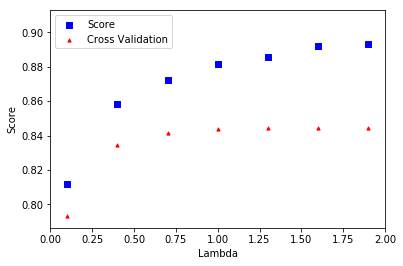


It took the following time to complete this task: 0:01:58.257486


In [21]:
start = datetime.now()
# Try to figure out the best Lambda for Logistic Regression by running the test with the PCA X variable and mapping them out.
# Temporary lists to store the results
yl = []
cl = []

# For loop to run the model with different Lambdas represented as L
numb = np.arange(0.1, 2.0, 0.3)
for l in numb:
    lr = LogisticRegression(C=l, multi_class='multinomial', solver='lbfgs')
    lr.fit(X_train_tfidf, y_train2)
    yl.append(lr.score(X_train_tfidf, y_train2))
    cl.append(np.mean(cross_val_score(lr, X_train_tfidf, y_train2, cv=5)))

# Plot the results of the accuracy and Cross Validation Score
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Lambda')
plt.ylabel('Score')
ax1.scatter(x=numb, y=yl, c='b', marker="s", label='Score')
ax1.scatter(x=numb, y=cl, s=10, c='r', marker="^", label='Cross Validation')
plt.legend(loc='upper left');
plt.show()
print('\nIt took the following time to complete this task:', datetime.now() - start)

In [22]:
start = datetime.now()
lr = LogisticRegression(C=1, multi_class='multinomial', solver='lbfgs')
testing_func(lr, models, tf_idf_method)
print('\nIt took the following time to complete this task:', datetime.now() - start)

                                  Accuracy
TF-IDF Training                   0.881460
TF-IDF Test                       0.841988
TF-IDF Cross Validation           0.844004
TF-IDF with LSA Training          0.805827
TF-IDF with LSA Test              0.518547
TF-IDF with LSA Cross Validation  0.804058

It took the following time to complete this task: 0:00:41.959421


### Support Vector Machines

SVM uses a multi-dimensional hyperplane to classify based on the regularization parameter ("C") and Gamma. A lower C will look for a larger margin hyperplane even if it misclassifies points leading to less overfitting, but potentially lower overall accuracy. Gamma looks at each individual training set point and which ones are considered. A higher gamma means that only close points will be considered while a low gamma means points far away will be considered when determining the hyperplane.

Luckily, Grid Search CV exists to assist in the optimization of "C" and gamma.

In [23]:
# SKlearn has a tool that will optimize SVC
start = datetime.now()
svc = LinearSVC(multi_class='ovr')
# Set the hyperparameters
svcparameters = {'C':[1,5,8]}
# Run it through the tool.
grid = GridSearchCV(svc, svcparameters).fit(X_train_tfidf, y_train2)
predicted = grid.predict(X_test_tfidf)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
svcparameters = grid.best_params_

print('\nIt took the following time to complete this task:', datetime.now() - start)

The best parameters are {'C': 1} with a score of %0.8311882885972671

It took the following time to complete this task: 0:00:17.951020


In [24]:
start = datetime.now()
svc = LinearSVC(C=svcparameters['C'], multi_class='ovr')
testing_func(svc, models, tf_idf_method)
print('\nIt took the following time to complete this task:', datetime.now() - start)

                                  Accuracy
TF-IDF Training                   0.909312
TF-IDF Test                       0.835165
TF-IDF Cross Validation           0.834961
TF-IDF with LSA Training          0.796404
TF-IDF with LSA Test              0.519142
TF-IDF with LSA Cross Validation  0.795249

It took the following time to complete this task: 0:00:43.932289


### Random Forest

Random Forest employs a bootstrapping method of taking random subsamples of data and creating a decision tree for the classifier. The number of estimators below is how many trees it is employing to make the decision. Max Depth is the layers of nodes in the trees. The deeper the tree, the more likely it is to overfit the classifier by going into variables that aren't important in making the ultimate decision. Due to the number of features and how they work in this model, it is working better with a deeper tree of 16 than models run with lower depths. <br>
<br>
n_jobs is set to 4 to account for parallel processing. With a quadcore CPU, each core is able to create decision trees cutting down the overall time it takes to create the forest of decision trees used to classify the wine variety.

In [25]:
start = datetime.now()
rfc = RandomForestClassifier(n_estimators=1000, 
                                 max_depth=16, n_jobs=-1)
testing_func(rfc, models, tf_idf_method)
print('\n It took the following time to complete this task:', datetime.now() - start)

                                  Accuracy
TF-IDF Training                   0.596238
TF-IDF Test                       0.585341
TF-IDF Cross Validation           0.592845
TF-IDF with LSA Training          0.887633
TF-IDF with LSA Test              0.708182
TF-IDF with LSA Cross Validation  0.813697

 It took the following time to complete this task: 0:07:51.591590


## Spacy
Now, let's prep the data for analysis using the natural language processor, Spacy. First, we need to create our functions for creating word counts and features based on those counts.

In [26]:
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]

def bow_features(sentences, common_words):

    # Scaffold the data frame and initialize counts to zero.
    s_index = len(sentences)
    df = pd.DataFrame(columns=common_words, index=range(s_index))
    
    df['content'] = sentences['content']
    df['author'] = sentences['author']
    df = df.fillna(0)
    

    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['content']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
       
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1

        # This counter is just to make sure the kernel didn't hang.
        if i % 5000 == 0:
            print("Processing row {}".format(i))
            
    return df


In [38]:
from datetime import datetime

start = datetime.now()
# Set up Spacy
nlp = spacy.load('en')
# Create a dataframe for our parsed descriptions and parse them.
parsed_content = test_df
# BUG here. 
parsed_content['content'] = parsed_content['content'].apply(lambda x: nlp(x))

# Could this help?: https://stackoverflow.com/questions/45748424/python-spacy-create-nlp-document-argument-string-has-incorrect-type 

"""
# Figure out the most common words
content_words = parsed_content['content'].apply(bag_of_words)
flat_list = [item for sublist in content_words for item in sublist]
common_words = set(flat_list)

# Use the second function to count the appearance of the common words in each description
word_counts = bow_features(parsed_content, common_words)
print(word_counts.head(10))
print('\nIt took the following time to complete this task:', datetime.now() - start)"""

TypeError: Argument 'string' has incorrect type (expected str, got spacy.tokens.doc.Doc)

Now that there are word counts for each description, let's use that to see if the computer can figure out what the  variety is by the descriptions. Since we are using word counts in a dataframe and not creating a vectorized dataset as above in TF_IDF, it is easy to add other features like country of origin for the wine, which may give an additional clue.

In [ ]:
# Set the X,Y and create a training/test set.
X = word_counts.drop(['author', 'content'], 1)
y = word_counts['author']

# Splitting into training and test sets
Spacy_X_train, Spacy_X_test, Spacy_y_train, Spacy_y_test= train_test_split(X, y, test_size=0.4, random_state=0)
print(set(Spacy_y_test), varieties_list)
# These will be the models for SpaCy
models = [[Spacy_X_train, Spacy_y_train, Spacy_X_test, Spacy_y_test]] 

# Let's tell it that it is SpaCy
Spacy_method = ['SpaCy Training', 'SpaCy Test', 'SpaCy CV']

In [ ]:
# Start with a simple sequential model
model = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model.add(Dense(128, activation='sigmoid', input_shape=(Spacy_X_test.shape[1],)))
# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model.add(Dense(1, activation='sigmoid'))

model.summary()
sgd = SGD(lr = 0.1, momentum = 0.9, decay = 0, nesterov = False)
# Compile the model to put it all together.
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
start = datetime.now()
history = model.fit(Spacy_X_train, Spacy_y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(Spacy_X_test, Spacy_y_test))
score = model.evaluate(Spacy_X_test, Spacy_y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('\nIt took the following time to complete this task:', datetime.now() - start)

In [ ]:
x_train = Spacy_X_train.values
x_test = Spacy_X_test.values

In [ ]:

# set parameters:
max_features = 20
maxlen = 16
batch_size = 64
embedding_dims = 25
filters = 216
kernel_size = 3
hidden_dims = 256
epochs = 100

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

In [ ]:
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.1))
model.add(Activation('sigmoid'))
# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.1))
model.add(Activation('relu'))
# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Now, let's apply the same three models as above to get an apples to apples comparison.

### Logistic Regression

In [ ]:
start = datetime.now()

# Putting it in multi-class and changing the solver allows it to handle multinomial classification
lr = LogisticRegression(C=1, multi_class='multinomial', solver='lbfgs')
testing_func(lr, models, Spacy_method)
print('It took the following time to complete this task:', datetime.now() - start)

### SVC

In [ ]:
start = datetime.now()
# The "ovr" method allows SVC to do multinomial classification
svc = LinearSVC(C=svcparameters['C'], multi_class='ovr')
testing_func(svc, models, Spacy_method)
print('It took the following time to complete this task:', datetime.now() - start)

### Random Forest

In [ ]:
start = datetime.now()
rfc = RandomForestClassifier(n_estimators=1000, 
                                 max_depth=16, n_jobs=4)
testing_func(rfc, models, Spacy_method)
print('\nIt took the following time to complete this task:', datetime.now() - start)

In [ ]:
model = LogisticRegression(C=1, multi_class='multinomial', solver='lbfgs')
model.fit(Spacy_X_train, Spacy_y_train)
y_pred = model.predict(Spacy_X_test)
print(len(set(Spacy_y_test)), len(word_count['author']))
conf_mat = confusion_matrix(Spacy_y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=word_count['author'], yticklabels=word_count['author'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Unsupervised Learning

First, let's use the LSA generated X to see similarities in the tweets to see the different aspects the machine sees in the data.

In [ ]:
articles_by_component=pd.DataFrame(lsa_X,index=test_df['content']) 
articles_by_component.shape

print("Percent variance captured by all components:",total_variance*100)


for i in range(3): 
    print('Component {}:'.format(i)) 
    print(articles_by_component.loc[:,i].sort_values(ascending=False)[0:5])



In [ ]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(lsa_X) * np.asmatrix(lsa_X).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=test_df['content').iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])


In [ ]:
Spacy_X = word_counts.drop(['content'], 1)
pca = PCA(n_components=20)
Spacy_X_pca = pca.fit_transform(Spacy_X)
Spacy_X_pca = pd.DataFrame(Spacy_X_pca)

In [ ]:
start = datetime.now()
models = [Spacy_X_pca, lsa_X]
kclust = np.arange(2, 11, 2)
for k in kclust:
    # Calculate predicted values.
    kmeans = KMeans(n_clusters=k, random_state=0)
    for m in models:
        kmeans.fit(m)
        # Check the solution against the data.
        labelskm = kmeans.labels_
        print(k, metrics.silhouette_score(m, labelskm, metric='euclidean'))
print('\nIt took the following time to complete this task:', datetime.now() - start)